In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import os
os.chdir("/home/anonymous/PycharmProjects/thesisPractical")
from scripts.db_connector import Connector
import pandas
import numpy as np
import pickle
import sklearn as sk

2023-05-22 16:55:32.706634: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 16:55:33.444284: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [25]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
data = pandas.concat([pandas.read_csv("./codes/java-code-graphrepr"), pandas.read_csv("./codes/java-code/false-graphrepr")])
data.dropna()
data.iloc[1,0]

Num GPUs Available:  1


'10006681.7660-cpg.dot.getMergedContent.460104'

In [46]:
typeMap = {int(data.iloc[x,0].split(".")[0]):data.iloc[x,1:].values.tolist() for x in range(len(data))}
pickle_save = "/home/anonymous/PycharmProjects/thesisPractical/pickle/java-save"
x = []
y = []

with open(f"{pickle_save}/data.pkl", "rb") as d:
    da = pandas.read_pickle(d)
    for j in da:
        for i in j.values:
            if typeMap.get(i[0], 0) and typeMap.get(i[1], 0):
                x.append([typeMap[i[0]], typeMap[i[1]]])
                y.append(True)
with open(f"{pickle_save}/false/data.pkl", "rb") as d:
    da = pandas.read_pickle(d)
    for j in da:
        for i in j.values:
            if typeMap.get(i[0],0) and typeMap.get(i[1],0):
                x.append([typeMap[i[0]], typeMap[i[1]]])
                y.append(False)

# c = 1
# for i in range(data.shape[0]):
#     file = "".join(filter(str.isalpha, data.iloc[i,0].split(".")[0]))
#     funcName = data.iloc[i,0].split(".")[-2]
#     if not typeMap.get(file+funcName, 0):
#         typeMap[file+funcName] = c
#         c += 1
#     data.iloc[i,0] = typeMap[file+funcName]
# data.head()

In [4]:
import pickle
with open("data.pkl", "wb") as d:
    pickle.dump([x,y], d)
    d.close()


NameError: name 'x' is not defined

In [48]:
# x = []
# y = []
# for i in frames[1:]:
#     for j in frames[1:]:
#         minlen = min(len(i), len(j))
#         for k in range(minlen):
#             x.append([i.iloc[k,1:].values.tolist(), j.iloc[k,1:].values.tolist()])
#             y.append(i.iloc[k,1] == j.iloc[k,1])
# x
model = None
len(x)

11848

In [49]:
tf.random.set_seed(12)
tf.keras.backend.clear_session()
x = np.array(x).astype("float64")
y = np.array(y).astype("int")

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense

# Define the input shape
input_shape = (2, 16)
input_layer = Input(shape=input_shape)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define the input shape
input_shape = (2, 16)

# Define the model
model = Sequential([
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


In [50]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
260/260 [==============================] - 3s 5ms/step - loss: 0.0536 - accuracy: 0.9930 - val_loss: 2.3600e-04 - val_accuracy: 1.0000
Epoch 2/10
260/260 [==============================] - 1s 5ms/step - loss: 5.0845e-04 - accuracy: 0.9999 - val_loss: 0.0012 - val_accuracy: 0.9994
Epoch 3/10
260/260 [==============================] - 1s 5ms/step - loss: 6.6073e-04 - accuracy: 0.9999 - val_loss: 1.4028e-05 - val_accuracy: 1.0000
Epoch 4/10
260/260 [==============================] - 1s 5ms/step - loss: 7.8034e-05 - accuracy: 1.0000 - val_loss: 1.7183e-05 - val_accuracy: 1.0000
Epoch 5/10
260/260 [==============================] - 1s 5ms/step - loss: 2.9558e-05 - accuracy: 1.0000 - val_loss: 9.2324e-06 - val_accuracy: 1.0000
Epoch 6/10
260/260 [==============================] - 1s 5ms/step - loss: 6.7596e-05 - accuracy: 1.0000 - val_loss: 2.7343e-06 - val_accuracy: 1.0000
Epoch 7/10
260/260 [==============================] - 1s 5ms/step - loss: 1.9319e-05 - accuracy: 1.0000 - va

112/112 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1788
           1       1.00      1.00      1.00      1767

    accuracy                           1.00      3555
   macro avg       1.00      1.00      1.00      3555
weighted avg       1.00      1.00      1.00      3555

AUC-ROC: 1.0


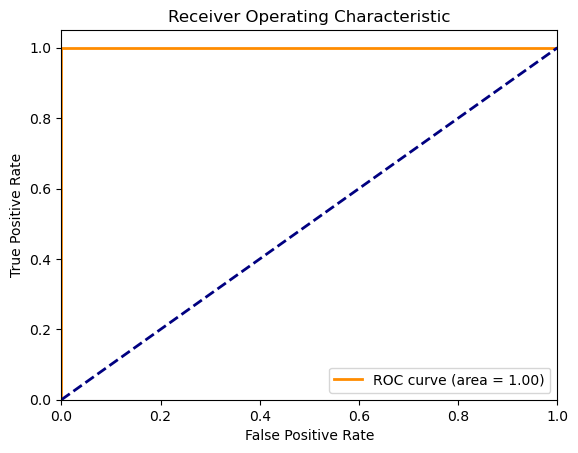

In [51]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming that 'model' is your trained model and 'X_test', 'y_test' are your test data.

# Predict the probabilities for the test data
y_pred_prob = model.predict(x_test).ravel()

# Predict the classes for the test data
y_pred = np.round(y_pred_prob)

# Print precision, recall, and F1-score
print(classification_report(y_test, y_pred))

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("AUC-ROC:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
lw = 2  # Line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

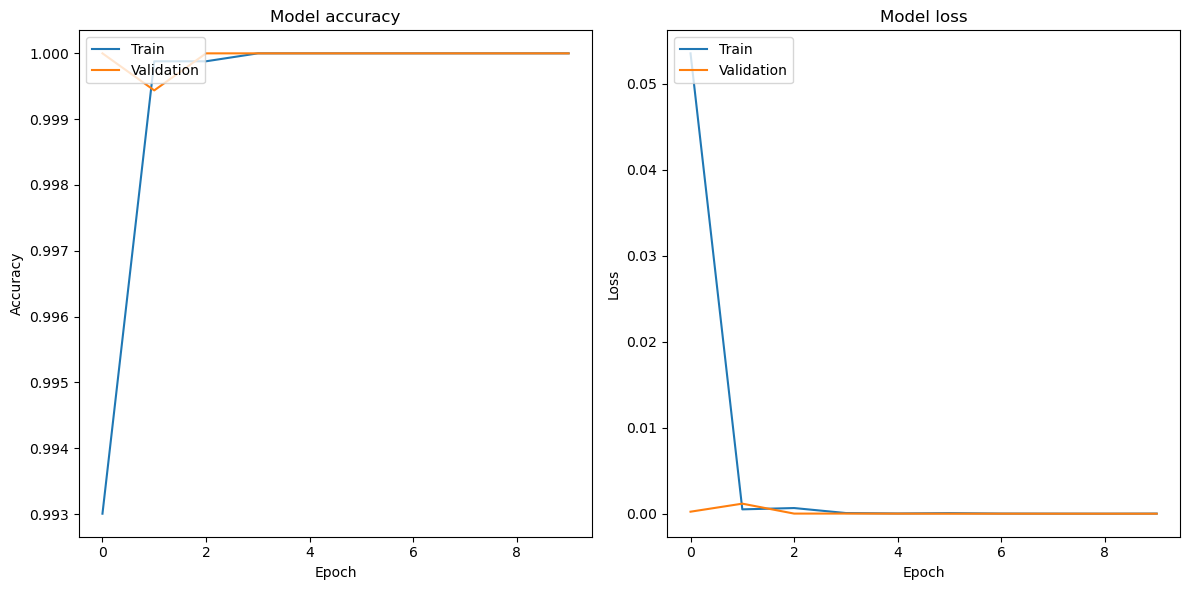

In [52]:
import matplotlib.pyplot as plt

# Assuming that 'model' is your trained model, and 'history' is the returned History object from model.fit
# e.g., history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)

# Plot training & validation accuracy values
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
history.history